In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Input data
i1,i2 = 0.05,0.1

# Target data
t1,t2 = 0.5,0.5

In [3]:
# Weights
w1 = 0.15
w2 = 0.2
w3 = 0.25
w4 = 0.3
w5 = 0.4
w6 = 0.45
w7 = 0.5
w8 = 0.55

In [4]:
# Learning rate
lr = [0.1,0.2,0.5,0.8,1.0,2.0]

In [5]:
# dictionary that has the learning rate 
# as key and the corresponding list of errors 
# and list of epochs as values

lr_dict = { 0.1 : [[],[]], 
           0.2 : [[],[]], 
           0.5 : [[],[]], 
           0.8 : [[],[]], 
           1.0 : [[],[]], 
           2.0 : [[],[]] }


Learning rate:  0.1
Final weights:  0.14759022399188299 0.19518044798376574 0.24728683077459623 0.29457366154919246 0.28734129806637 0.3365100307893313 0.36374351855021364 0.4127381404881795
Final error:  0.00789511004702777
Final output:  0.5789273692584652 0.5977787833632298


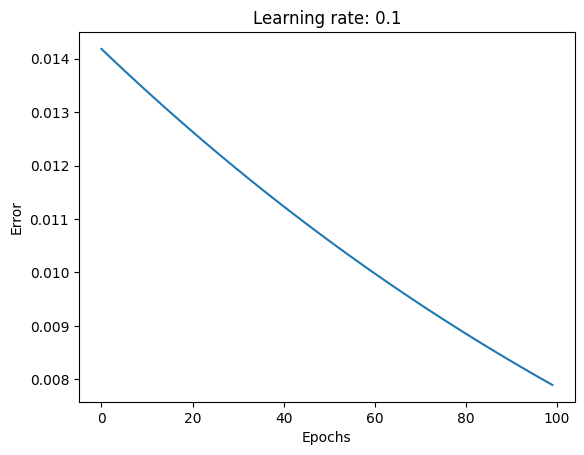

--------------------------------------------------
Learning rate:  0.2
Final weights:  0.14559145085691055 0.1911829017138207 0.2448975840546724 0.2897951681093448 0.1410041832582521 0.18909909371537825 0.18299706819313005 0.2306653858518859
Final error:  0.0022794087728258373
Final output:  0.5421529528784338 0.5527441571103399


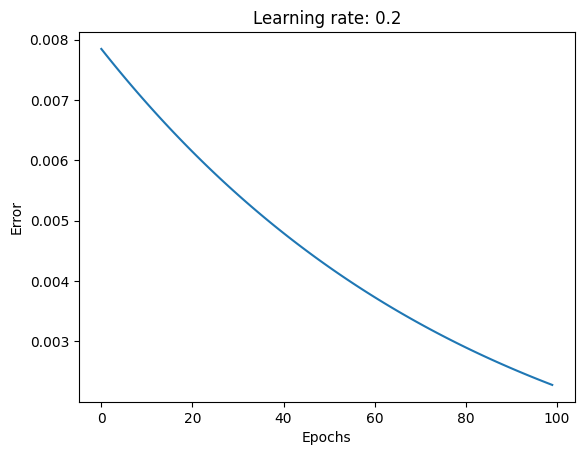

--------------------------------------------------
Learning rate:  0.5
Final weights:  0.14493121614580018 0.1898624322916001 0.2438902879470082 0.2877805758940164 0.00889564912556632 0.05602699181151564 0.01757388497347127 0.06403565048852086
Final error:  9.113838254513836e-05
Final output:  0.5084083716344767 0.5105629565722294


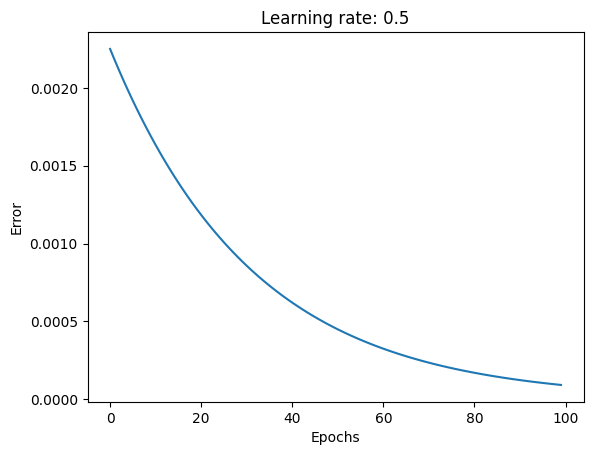

--------------------------------------------------
Learning rate:  0.8
Final weights:  0.1449365537903099 0.18987310758061965 0.24381759450331297 0.28763518900662594 -0.021168320583130288 0.025744527764154968 -0.02019565573140353 0.025991614080182808
Final error:  4.94363163780147e-07
Final output:  0.5006192119541653 0.5007780121357531


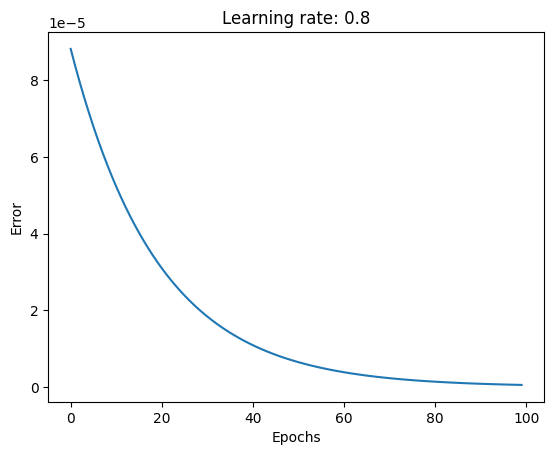

--------------------------------------------------
Learning rate:  1.0
Final weights:  0.14493932892629438 0.1898786578525883 0.2438144791499831 0.2876289582999662 -0.02344408094753957 0.02345223991324796 -0.023055049813298808 0.023111453929145206
Final error:  7.033390093100831e-10
Final output:  0.500023355957549 0.5000293458219444


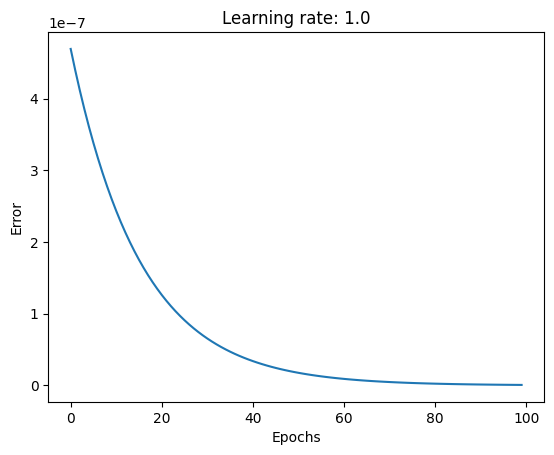

--------------------------------------------------
Learning rate:  2.0
Final weights:  0.14493944357831537 0.1898788871566308 0.24381436483683838 0.28762872967367675 -0.023532558630870247 0.02336311970345274 -0.02316621855801369 0.022999477875086095
Final error:  1.1870055777625926e-15
Final output:  0.5000000303417227 0.5000000381233658


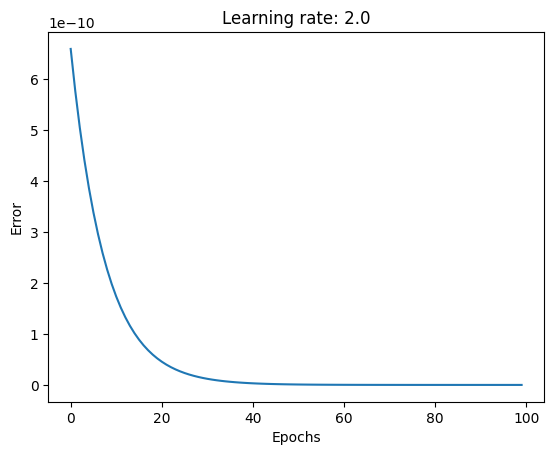

--------------------------------------------------


In [6]:
epochs = 100
for i in lr:
    for j in range(epochs):
        # Epoch List
        lr_dict[i][0].append(j)
        # Forward pass
        h1 = i1*w1 + i2*w2
        a_h1 = 1/(1+np.exp(-1*h1))
        h2 = i1*w3 + i2*w4
        a_h2 = 1/(1+np.exp(-1*h2))
        o1 = a_h1*w5 + a_h2*w6
        a_o1 = 1/(1+np.exp(-1*o1))
        o2 = a_h1*w7 + a_h2*w8
        a_o2 = 1/(1+np.exp(-1*o2))

        # Error calculation
        E1 = 0.5*(t1-a_o1)**2
        E2 = 0.5*(t2-a_o2)**2
        E_total = E1+E2
        lr_dict[i][1].append(E_total)

        # Backward pass (gradient calculation)
        dw1 = ((a_o1-t1)*a_o1*(1-a_o1)*w5 + (a_o2-t2)*a_o2*(1-a_o2)*w7)*a_h1*(1-a_h1)*i1
        dw2 = ((a_o1-t1)*a_o1*(1-a_o1)*w5 + (a_o2-t2)*a_o2*(1-a_o2)*w7)*a_h1*(1-a_h1)*i2
        dw3 = ((a_o1-t1)*a_o1*(1-a_o1)*w6 + (a_o2-t2)*a_o2*(1-a_o2)*w8)*a_h2*(1-a_h2)*i1
        dw4 = ((a_o1-t1)*a_o1*(1-a_o1)*w6 + (a_o2-t2)*a_o2*(1-a_o2)*w8)*a_h2*(1-a_h2)*i2
        dw5 = (a_o1-t1)*a_o1*(1-a_o1)*a_h1
        dw6 = (a_o1-t1)*a_o1*(1-a_o1)*a_h2
        dw7 = (a_o2-t2)*a_o2*(1-a_o2)*a_h1
        dw8 = (a_o2-t2)*a_o2*(1-a_o2)*a_h2

        # Update weights
        w1 -= i*dw1
        w2 -= i*dw2
        w3 -= i*dw3
        w4 -= i*dw4
        w5 -= i*dw5
        w6 -= i*dw6
        w7 -= i*dw7
        w8 -= i*dw8

    # Plotting error over epochs for each learning rate
    print("Learning rate: ",i)
    print("Final weights: ",w1,w2,w3,w4,w5,w6,w7,w8)
    print("Final error: ",E_total)
    print("Final output: ",a_o1,a_o2)
    plt.plot(lr_dict[i][0],lr_dict[i][1])
    plt.xlabel("Epochs")
    plt.ylabel("Error")
    plt.title("Learning rate: "+str(i))
    plt.show()
    print("--------------------------------------------------")
    
